<a href="https://colab.research.google.com/github/mehrahmad9033/DataScience/blob/Analytical_Math/Assginment1_AnalyticalMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from plotly.subplots import make_subplots
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [5]:
print("Questions to be Answered in this Analysis:")
print("1. Which car manufacturers are the most commonly used for EVs in Washington?")
print("2. What are the highest and lowest electric ranges in this dataset, and which car makers and models do they correspond to?")
print("3. Is the maximum electric range value unique? If not, which cars share this range?")
print("4. Is the minimum electric range value unique? If not, which cars share this range?")
print("5. How does the electric range vary between car makers and between models?")
print("6. Which are the top 5 cities adopting EVs?")
print("7. How does the EV adoption rate vary among car makers over the years?")
print("8. Is there a correlation between the electric range and the city of an EV?")
print("9. Which county has the greatest variety of EV car models?")


print("\nStatistical Analysis Requirements:")
print("• Descriptive Statistics: Calculate mean, median, standard deviation, and range for key variables")
print("• Correlation Analysis: Analyze relationships between key variables (e.g., electric range and vehicle models)")
print("• Hypothesis Testing: Perform ANOVA tests to determine statistically significant differences")
print("• Distribution Analysis: Examine value distributions through histograms, KDE plots, and violin plots")
print("• Time Series Analysis: Analyze trends over years using appropriate visualizations")
print("• Categorical Data Analysis: Analyze and visualize data across categories like manufacturers, cities, and counties")


Questions to be Answered in this Analysis:
1. Which car manufacturers are the most commonly used for EVs in Washington?
2. What are the highest and lowest electric ranges in this dataset, and which car makers and models do they correspond to?
3. Is the maximum electric range value unique? If not, which cars share this range?
4. Is the minimum electric range value unique? If not, which cars share this range?
5. How does the electric range vary between car makers and between models?
6. Which are the top 5 cities adopting EVs?
7. How does the EV adoption rate vary among car makers over the years?
8. Is there a correlation between the electric range and the city of an EV?
9. Which county has the greatest variety of EV car models?

Statistical Analysis Requirements:
• Descriptive Statistics: Calculate mean, median, standard deviation, and range for key variables
• Correlation Analysis: Analyze relationships between key variables (e.g., electric range and vehicle models)
• Hypothesis Testing

In [2]:
# Custom color palettes
custom_palette = sns.color_palette("viridis", 10)
custom_palette2 = sns.color_palette("plasma", 15)

# Increase default figure size for better readability
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

Loading the Electric Vehicle Population Data for Washington State...

--- First 5 rows of the dataset ---
Number of rows: 232230 
Number of columns: 17

-- Summary Statistics ---

--- Missing Values Analysis ---
                      Counts  Percentage
Legislative District     481    0.207122
Electric Range            27    0.011626
Base MSRP                 27    0.011626
Vehicle Location          11    0.004737
County                     4    0.001722
City                       4    0.001722
Postal Code                4    0.001722
Electric Utility           4    0.001722
2020 Census Tract          4    0.001722


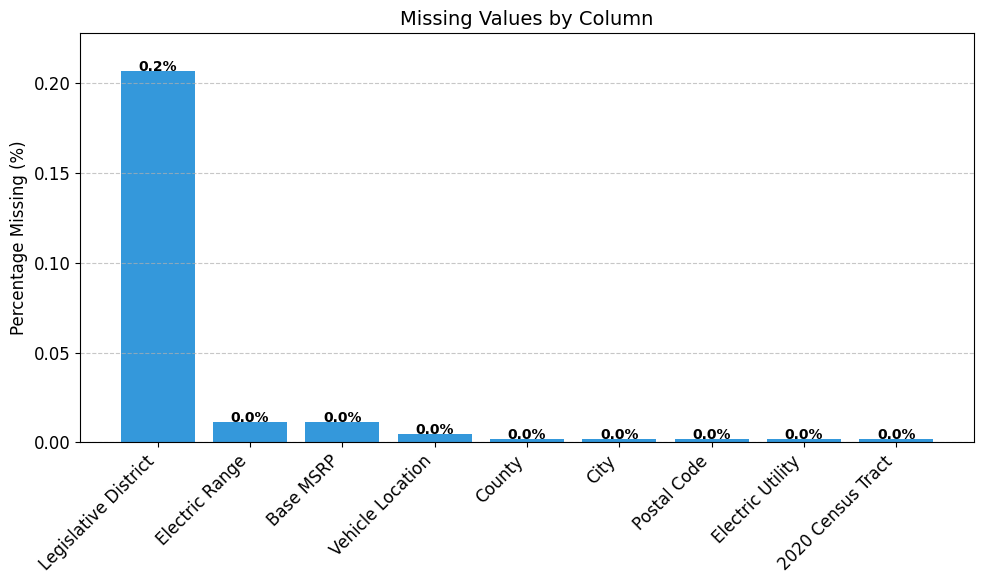

In [12]:
# 1. Load the Dataset
print("Loading the Electric Vehicle Population Data for Washington State...")
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# 2. Initial Data Inspection

# Display the first few rows
print("\n--- First 5 rows of the dataset ---")
df.head()

print(f"Number of rows: {df.shape[0]} ")
print(f"Number of columns: {df.shape[1]}")

print("\n-- Summary Statistics ---")
df.describe(include='all').T

# Checking missing values
missing_values=df.isnull().sum()
missing_percent=(missing_values/len(df))*100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns=['Counts','Percentage']
missing_data=missing_data[missing_data['Counts']>0].sort_values('Percentage',ascending=False)
print("\n--- Missing Values Analysis ---")
print(missing_data)



plt.figure(figsize=(10, 6))
bars = plt.bar(missing_data.index, missing_data['Percentage'], color='#3498db')
#Adding percentage labels on top of bars
for i, (idx, row) in enumerate(missing_data.iterrows()):
    plt.text(i, row['Percentage'], f"{row['Percentage']:.1f}%",
             ha='center', fontsize=10, fontweight='bold')

plt.title('Missing Values by Column', fontsize=14)
plt.ylabel('Percentage Missing (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(missing_data['Percentage']) * 1.1)  # Add some space for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.head()
df.tail()



In [20]:
#Fill missing values where appropriate
df['Country']=df['County'].fillna('Unknown')
df['City']=df['City'].fillna('Unknown')
df['Postal Code']=df['Postal Code'].fillna(0)



duplicates=df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")





**IQR Range Formula**



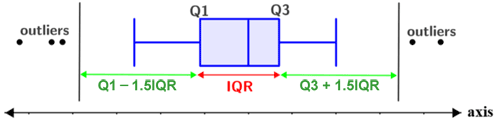

**Z-Score Formula**

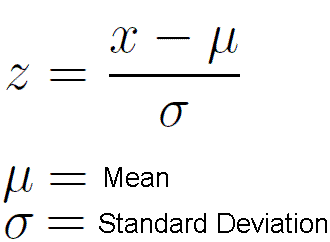

Original Dataset: 232230
Dataset with valid Electric Range : 232230 rows.

--- Outlier Detection Analysis ---

Outlier Detection Summary:
Column          Total Points    IQR Outliers     Z-Score Outliers
--------------- ------------ --------------- --------------------
Electric Range        232203           38625 (16.6%)             2662 (1.1%)
Base MSRP             232203            3277 (1.4%)             3277 (1.4%)


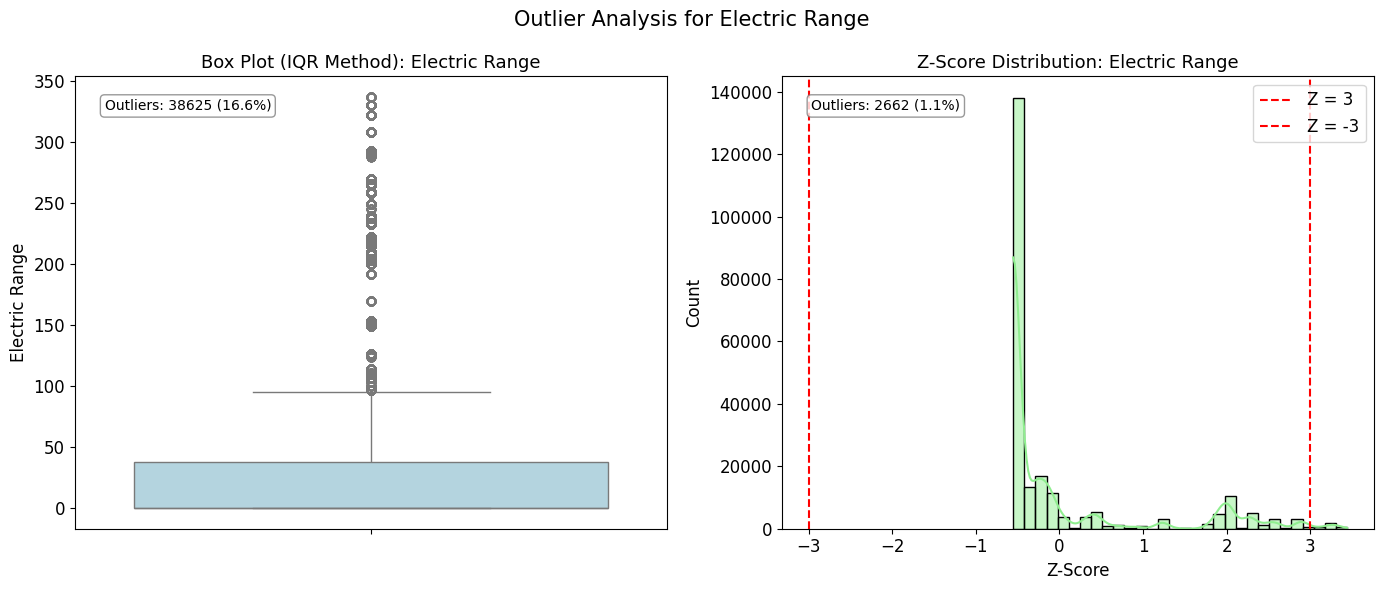


Example outliers for Electric Range:
          Make    Model  Model Year  Electric Range
0       TOYOTA     RAV4        2014           103.0
1        TESLA  MODEL 3        2019           220.0
131072   TESLA  MODEL S        2013           208.0
131074   TESLA  MODEL 3        2018           215.0
6        TESLA  MODEL 3        2018           215.0


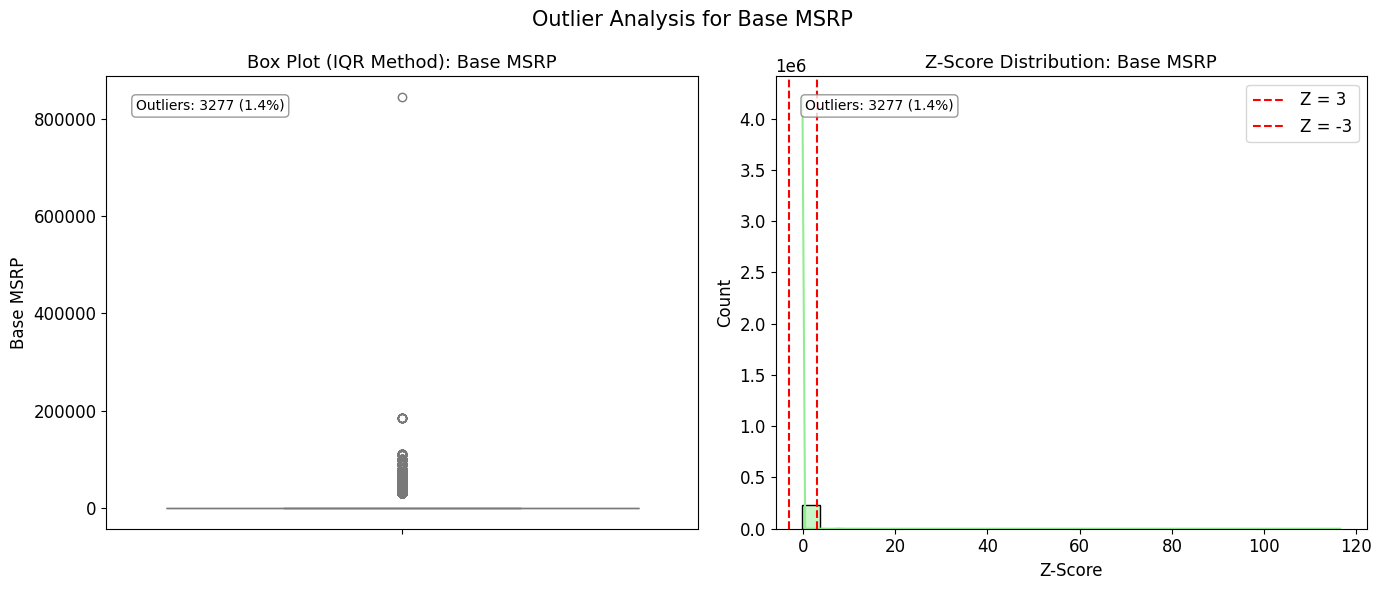


Example outliers for Base MSRP:
          Make      Model  Model Year  Base MSRP
131072   TESLA    MODEL S        2013    69900.0
65539   SUBARU  CROSSTREK        2019    34995.0
213007   VOLVO       XC90        2018    64950.0
180242     KIA       SOUL        2016    31950.0
81942    TESLA    MODEL S        2013    69900.0


In [22]:

# Data Cleaning: Outlier Detection with IQR and Z-Score comparison

df_with_range = df
print(f"Original Dataset: {df.shape[0]}")
print(f"Dataset with valid Electric Range : {df_with_range.shape[0]} rows.")

print("\n--- Outlier Detection Analysis ---")

# Select numeric columns for outlier analysis (excluding ID columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Focus on columns likely to need outlier detection (excluding years, codes, etc.)
columns_to_check = ['Electric Range']
if 'Base MSRP' in numeric_cols:
    columns_to_check.append('Base MSRP')

# Function to detect outliers for each column
def analyze_outliers(column_name):
    data = df[column_name].dropna()

    # IQR Method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR
    outliers_iqr = data[(data < lower_bound_iqr) | (data > upper_bound_iqr)]

    # Z-Score Method
    z_scores = stats.zscore(data)
    outliers_z = data[abs(z_scores) > 3]

    return {
        'column': column_name,
        'outliers_iqr_count': len(outliers_iqr),
        'outliers_z_count': len(outliers_z),
        'iqr_bounds': (lower_bound_iqr, upper_bound_iqr),
        'data': data,
        'outliers_iqr': outliers_iqr,
        'z_scores': z_scores,
        'outliers_z': outliers_z
    }

# Analyze each column and store results
outlier_results = {}
for col in columns_to_check:
    outlier_results[col] = analyze_outliers(col)

# Print summary table
print("\nOutlier Detection Summary:")
print(f"{'Column':<15} {'Total Points':>12} {'IQR Outliers':>15} {'Z-Score Outliers':>20}")
print(f"{'-'*15:<15} {'-'*12:>12} {'-'*15:>15} {'-'*20:>20}")

for col, results in outlier_results.items():
    print(f"{col:<15} {len(results['data']):>12} {results['outliers_iqr_count']:>15} ({results['outliers_iqr_count']/len(results['data'])*100:.1f}%) {results['outliers_z_count']:>16} ({results['outliers_z_count']/len(results['data'])*100:.1f}%)")

# Visualize only columns with outliers
for col, results in outlier_results.items():
    if results['outliers_iqr_count'] > 0 or results['outliers_z_count'] > 0:
        plt.figure(figsize=(14, 6))

        # Box Plot (IQR Method)
        plt.subplot(1, 2, 1)
        sns.boxplot(y=results['data'], color='lightblue')
        plt.title(f'Box Plot (IQR Method): {col}', fontsize=13)
        plt.ylabel(f'{col}', fontsize=12)
        if results['outliers_iqr_count'] > 0:
            plt.text(0.05, 0.95, f"Outliers: {results['outliers_iqr_count']} ({results['outliers_iqr_count']/len(results['data'])*100:.1f}%)",
                    transform=plt.gca().transAxes, fontsize=10, va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

        # Z-Score histogram
        plt.subplot(1, 2, 2)
        sns.histplot(results['z_scores'], kde=True, bins=30, color='lightgreen')
        plt.axvline(x=3, color='red', linestyle='--', label='Z = 3')
        plt.axvline(x=-3, color='red', linestyle='--', label='Z = -3')
        plt.title(f'Z-Score Distribution: {col}', fontsize=13)
        plt.xlabel('Z-Score', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend()
        if results['outliers_z_count'] > 0:
            plt.text(0.05, 0.95, f"Outliers: {results['outliers_z_count']} ({results['outliers_z_count']/len(results['data'])*100:.1f}%)",
                    transform=plt.gca().transAxes, fontsize=10, va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

        plt.suptitle(f'Outlier Analysis for {col}', fontsize=15)
        plt.tight_layout()
        plt.show()

        # If outliers are detected, show some example outliers
        if results['outliers_iqr_count'] > 0 or results['outliers_z_count'] > 0:
            # Get indices of outliers to find the corresponding rows
            outlier_indices = set(results['outliers_iqr'].index) | set(results['outliers_z'].index)
            outlier_examples = df.loc[list(outlier_indices)].head(5)

            print(f"\nExample outliers for {col}:")
            relevant_cols = ['Make', 'Model', 'Model Year', col]
            relevant_cols = [c for c in relevant_cols if c in df.columns]
            print(outlier_examples[relevant_cols])

In [28]:
# Context-based outlier handling for Electric Vehicle Range data
column = 'Electric Range'
data = df[column].dropna()

# Calculate standard outlier boundaries
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
outlier_count = len(outliers)

print(f"Potential outliers detected in {column}: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")

# For EV range data specifically, we'll use a hybrid approach:
# 1. For low-end outliers: Cap them as they're likely errors
# 2. For high-end outliers: Keep them as they represent technological advancement

# Cap only the low-end outliers
df_treated = df.copy()
df_treated.loc[df_treated[column] < lower_bound, column] = lower_bound

print(f"Low-end values (< {lower_bound:.2f} miles) have been capped")

# Update the main dataframe with the treated values
df_with_range = df_treated


Potential outliers detected in Electric Range: 38625 (16.63%)
Low-end values (< -57.00 miles) have been capped


        Make  Count  Percentage
0      TESLA  99692       42.93
1  CHEVROLET  16919        7.29
2     NISSAN  15457        6.66
3       FORD  12461        5.37
4        KIA  11224        4.83
5        BMW   9505        4.09
6     TOYOTA   9265        3.99
7    HYUNDAI   7218        3.11
8     RIVIAN   6712        2.89
9       JEEP   5920        2.55


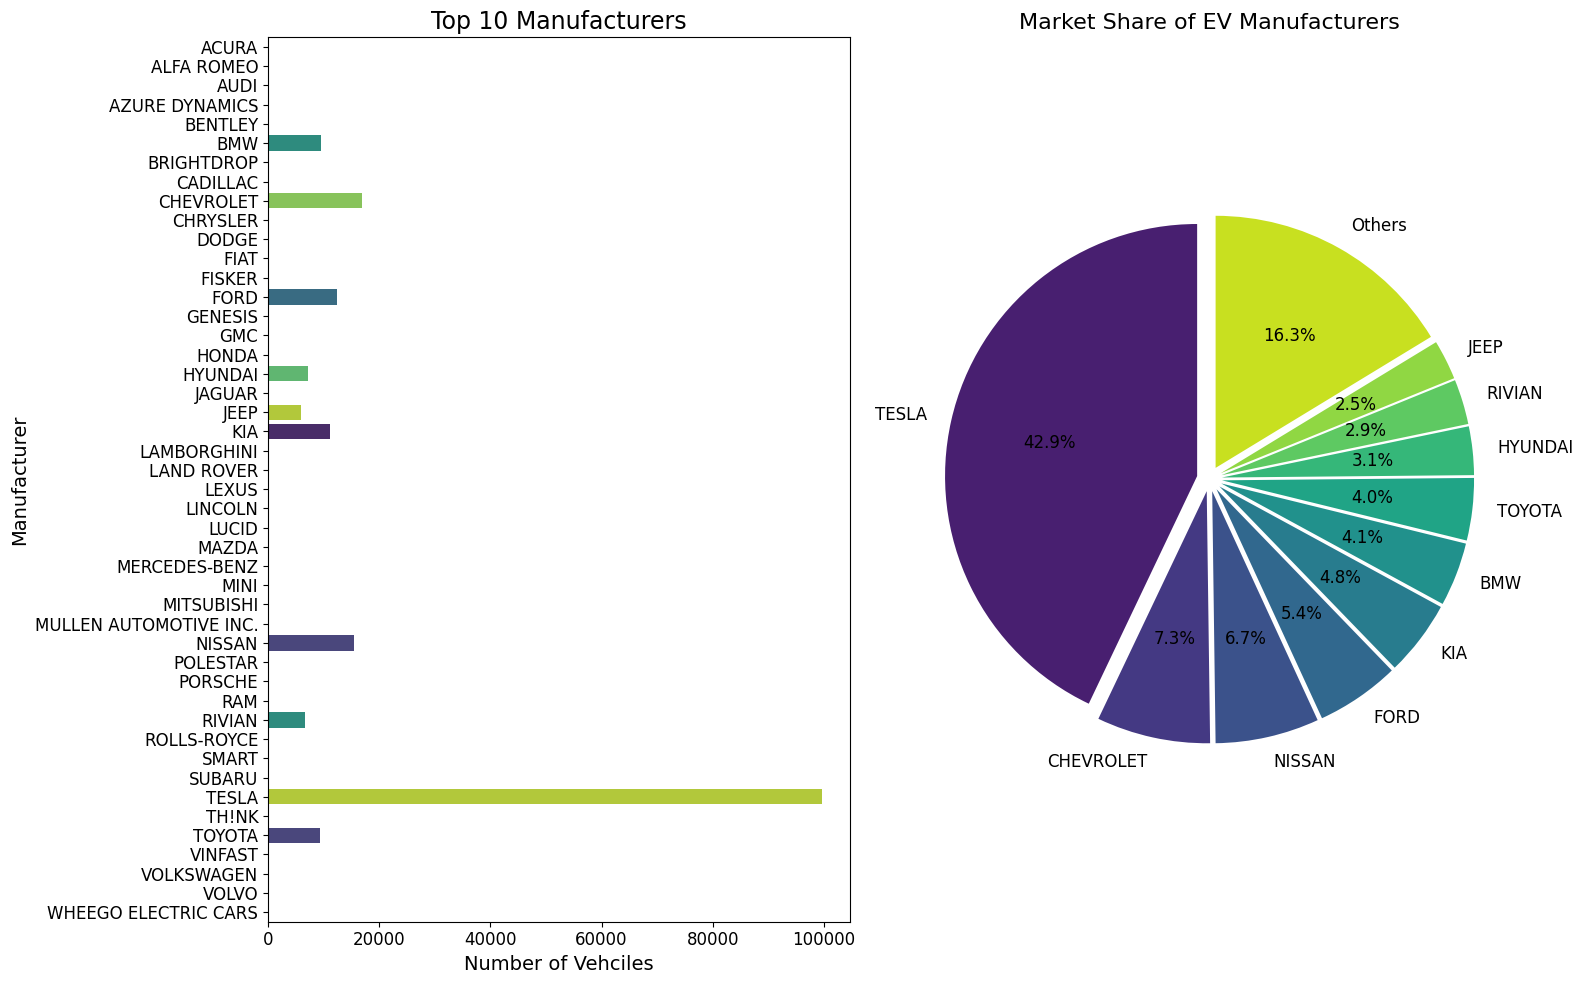

In [29]:
#Questions No1: Which car manufacturers are the most commonly used for EVs in Washington?

make_counts=df['Make'].value_counts().reset_index()
make_counts.columns=['Make','Count']
make_counts['Percentage']=(make_counts['Count']/make_counts['Count'].sum()*100).round(2)
print(make_counts.head(10))

fig=plt.figure(figsize=(16,10))

#chart1
ax1=fig.add_subplot(121)
sns.barplot(x='Count',y='Make',data=make_counts.head(10),palette=custom_palette)
ax1.set_title('Top 10 Manufacturers',fontsize=17)
ax1.set_xlabel('Number of Vehciles',fontsize=14)
ax1.set_ylabel('Manufacturer',fontsize=14)

#chart 2
ax2=fig.add_subplot(122)
#other categories
others_count=make_counts.iloc[10:]['Count'].sum()
top_makes_pie=pd.concat([make_counts.head(10),pd.DataFrame(
    {'Make':['Others'],'Count':[others_count],'Percentage':[make_counts.iloc[10:]['Percentage'].sum()]}
)],ignore_index=True)

ax2.pie(top_makes_pie['Count'], labels=top_makes_pie['Make'], autopct='%1.1f%%',
       startangle=90, explode=[0.05]*len(top_makes_pie),
       colors=sns.color_palette('viridis', len(top_makes_pie)))
ax2.set_title('Market Share of EV Manufacturers', fontsize=16)
ax2.axis('equal')

plt.tight_layout()
plt.show()

fig = px.bar(make_counts.head(15), x='Count', y='Make', orientation='h',
             title='Top 15 EV Manufacturers in Washington State',
             labels={'Count': 'Number of Vehicles', 'Make': 'Manufacturer'},
             color='Count', text='Percentage',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()



--- QUESTIONS 2, 3, 4: Electric Range Analysis ---
Maximum Electric Range: 337.0 miles
Minimum Electric Range: 0.0 miles

Cars with maximum electric range:
       Make    Model  Model Year  Electric Range
6156  TESLA  MODEL S        2020           337.0
Number of cars with maximum range: 1
Is the maximum range car unique to one model? No

Cars with minimum electric range:
             Make           Model  Model Year  Electric Range
4           TESLA         MODEL Y        2021             0.0
15          TESLA         MODEL Y        2023             0.0
31           FORD  MUSTANG MACH-E        2023             0.0
37            KIA            NIRO        2021             0.0
49          TESLA         MODEL 3        2021             0.0
...           ...             ...         ...             ...
141513      SMART       EQ FORTWO        2019             0.0
149556     TOYOTA           MIRAI        2023             0.0
153160     NISSAN           ARIYA        2025             0.0
1820

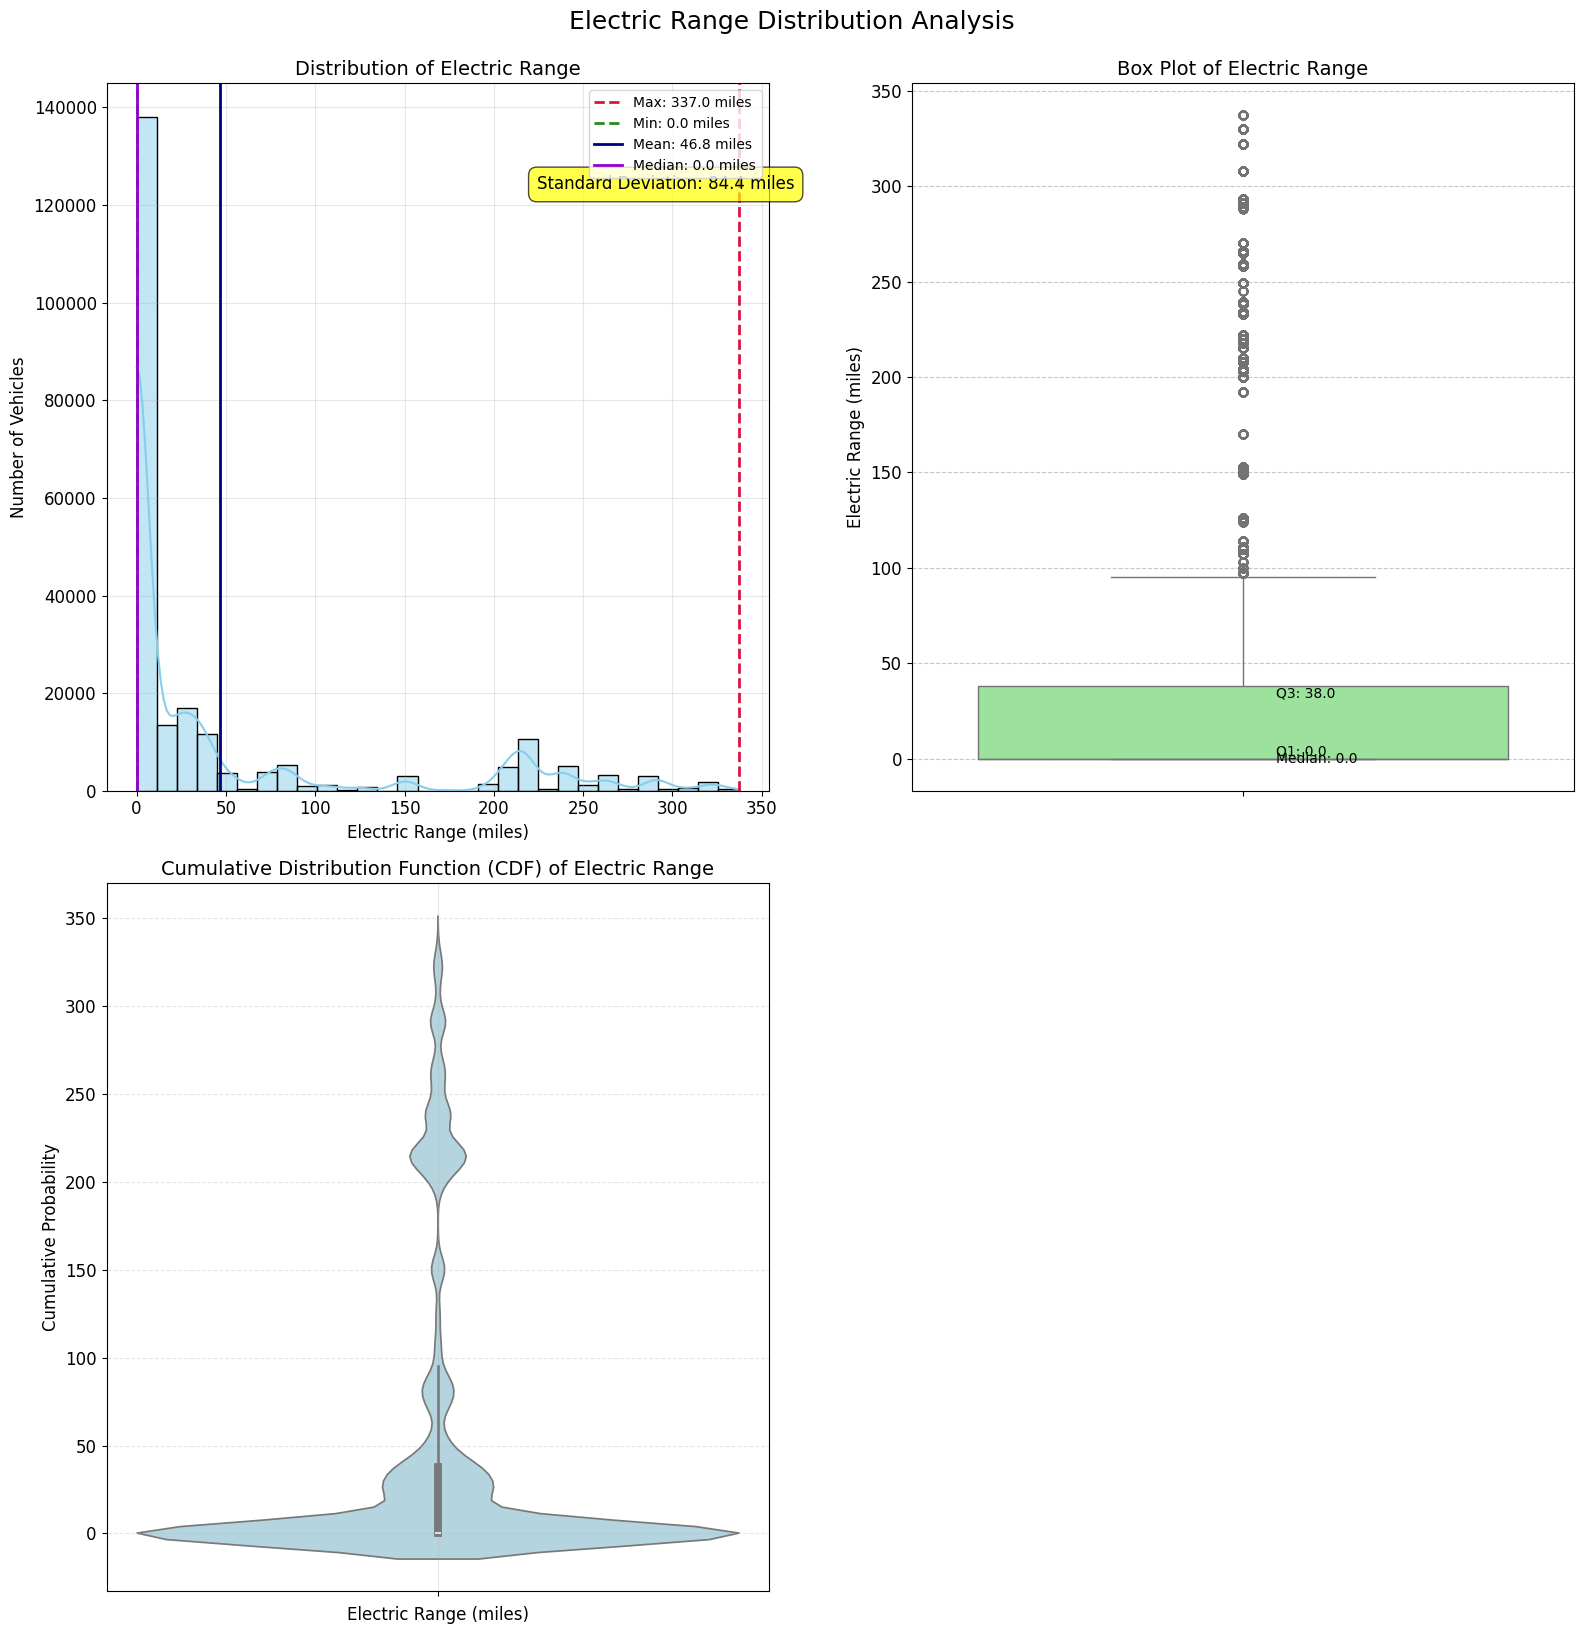

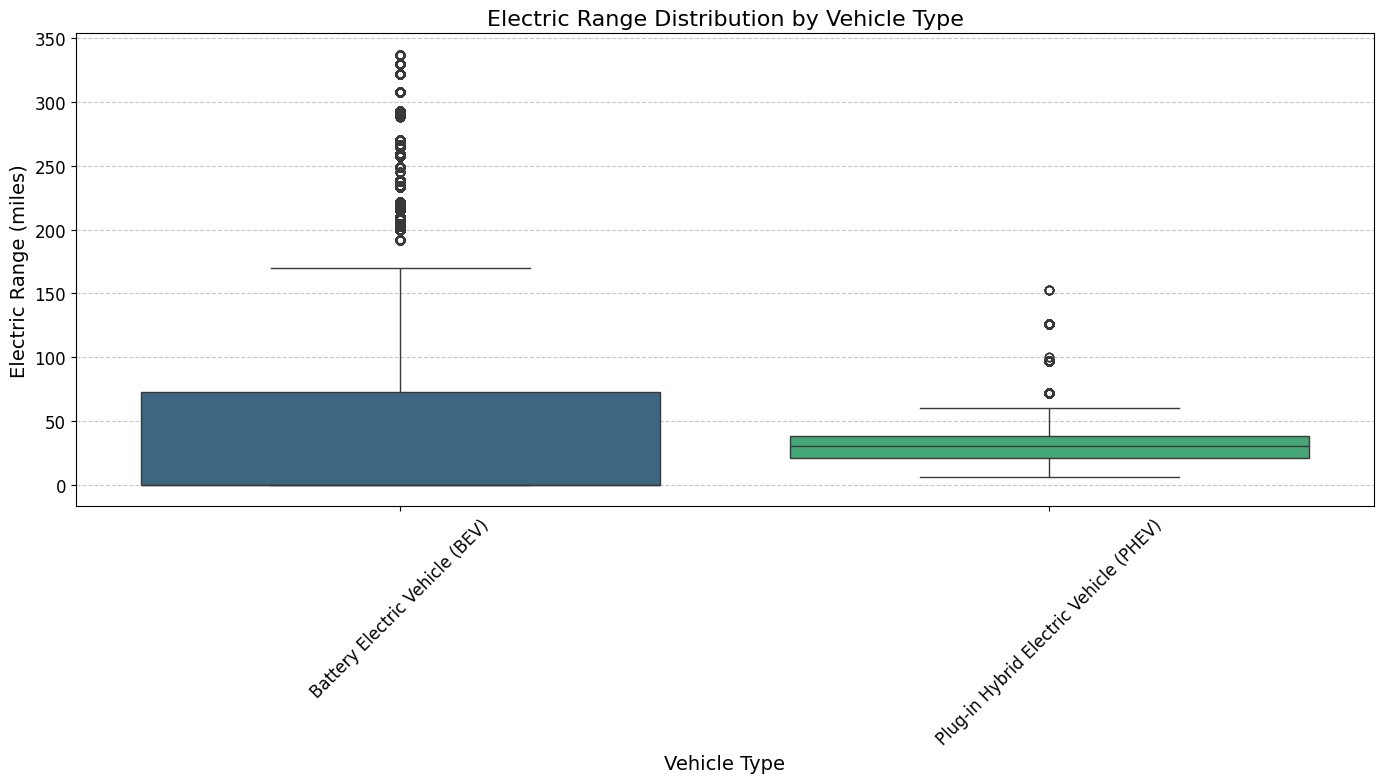

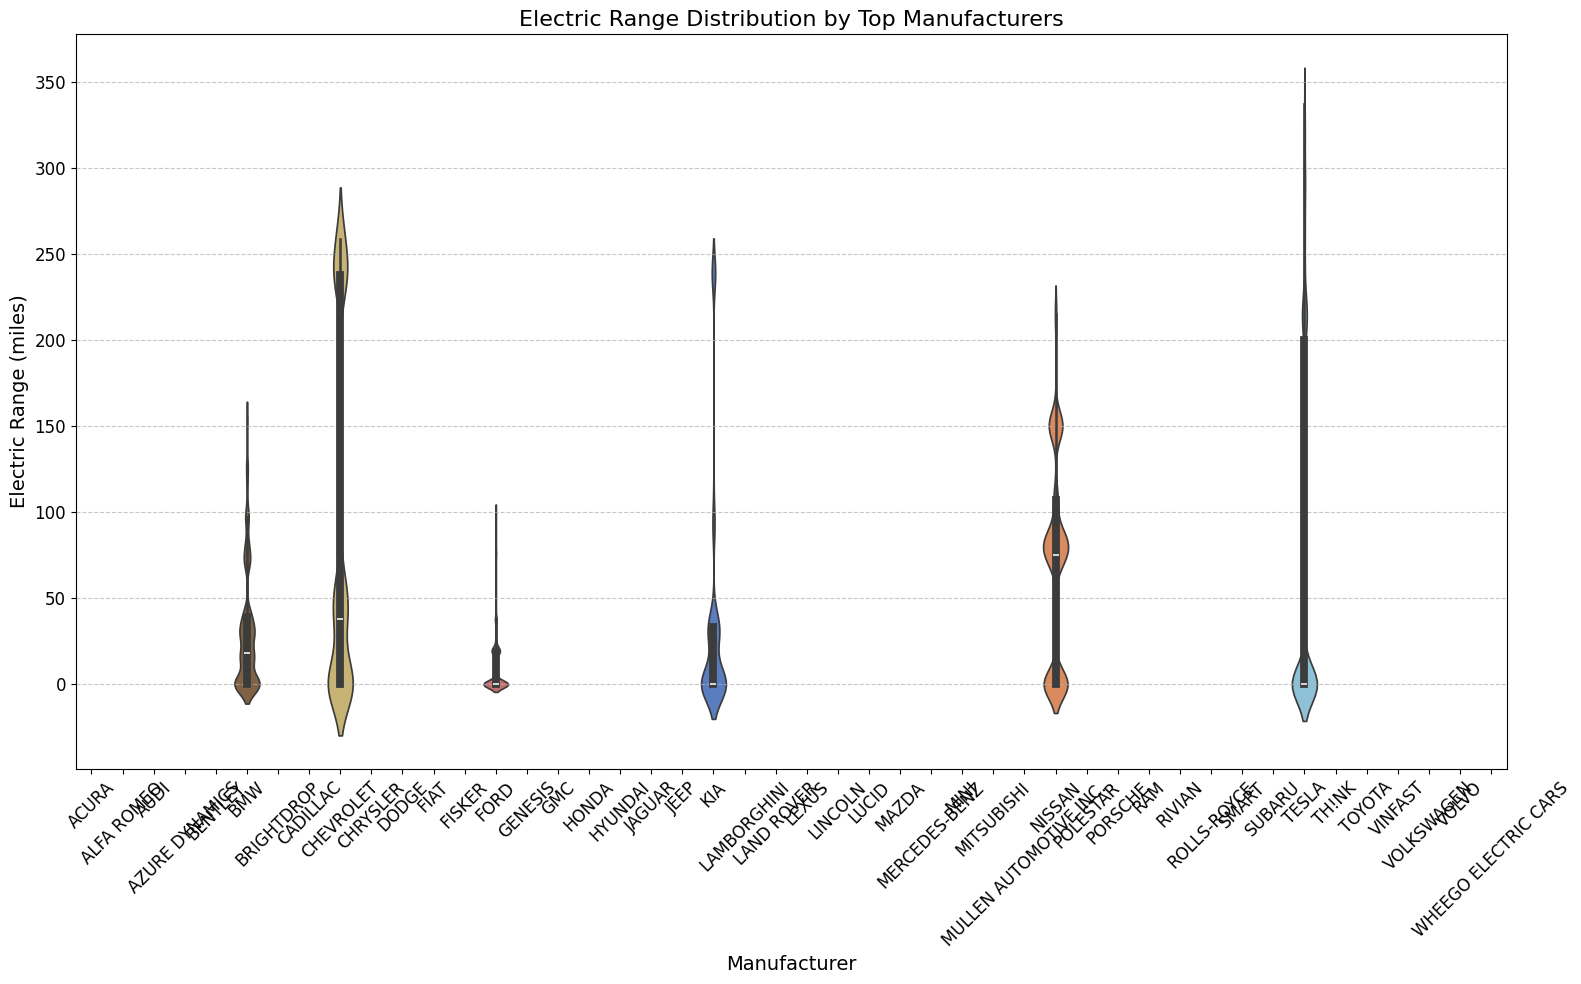

In [41]:
# QUESTIONS 2, 3, 4: What are the highest and lowest electric ranges? Are they unique?
print("\n--- QUESTIONS 2, 3, 4: Electric Range Analysis ---")

# Calculate max and min range
max_range = df_with_range['Electric Range'].max()
min_range = df_with_range['Electric Range'].min()

print(f"Maximum Electric Range: {max_range} miles")
print(f"Minimum Electric Range: {min_range} miles")

# Find cars with maximum range
max_range_cars = df_with_range[df_with_range['Electric Range'] == max_range]
print('\nCars with maximum electric range:')
max_range_unique = max_range_cars[['Make', 'Model', 'Model Year', 'Electric Range']].drop_duplicates()
print(max_range_unique)
print(f"Number of cars with maximum range: {len(max_range_unique)}")
print(f"Is the maximum range car unique to one model? {'No' if len(max_range_unique) > 1 or len(max_range_cars) > len(max_range_unique) else 'Yes'}")

# Find cars with minimum range
min_range_cars = df_with_range[df_with_range['Electric Range'] == min_range]
print('\nCars with minimum electric range:')
min_range_unique = min_range_cars[['Make', 'Model', 'Model Year', 'Electric Range']].drop_duplicates()
print(min_range_unique)
print(f"Number of vehicles with minimum range: {len(min_range_cars)}")
print(f"Is minimum range car unique? {'No' if len(min_range_unique) > 1 or len(min_range_cars) > len(min_range_unique) else 'Yes'}")

# Complete summary statistics
print("\n--- Summary Statistics for Electric Range ---")
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Variance',
                 'Minimum', 'Maximum', 'Range', '25th Percentile', '75th Percentile', 'IQR'],
    'Value': [
        df_with_range['Electric Range'].mean(),
        df_with_range['Electric Range'].median(),
        df_with_range['Electric Range'].mode()[0],
        df_with_range['Electric Range'].std(),
        df_with_range['Electric Range'].var(),
        df_with_range['Electric Range'].min(),
        df_with_range['Electric Range'].max(),
        df_with_range['Electric Range'].max() - df_with_range['Electric Range'].min(),
        df_with_range['Electric Range'].quantile(0.25),
        df_with_range['Electric Range'].quantile(0.75),
        df_with_range['Electric Range'].quantile(0.75) - df_with_range['Electric Range'].quantile(0.25)
    ]
})
print(stats_df)

# Create a multi-plot figure for different distribution visualizations
plt.figure(figsize=(16, 16))

# 1. Histogram with KDE and key statistics
plt.subplot(2, 2, 1)
ax = sns.histplot(df_with_range['Electric Range'], kde=True, bins=30, color='skyblue')

# Add vertical lines for key statistics
mean_range = df_with_range['Electric Range'].mean()
median_range = df_with_range['Electric Range'].median()
std_range = df_with_range['Electric Range'].std()

plt.axvline(max_range, color='crimson', linestyle='--', linewidth=2,
            label=f'Max: {max_range} miles')
plt.axvline(min_range, color='forestgreen', linestyle='--', linewidth=2,
            label=f'Min: {min_range} miles')
plt.axvline(mean_range, color='navy', linestyle='-', linewidth=2,
            label=f'Mean: {mean_range:.1f} miles')
plt.axvline(median_range, color='darkviolet', linestyle='-', linewidth=2,
            label=f'Median: {median_range:.1f} miles')

# Add standard deviation annotation
plt.annotate(f'Standard Deviation: {std_range:.1f} miles',
             xy=(0.65, 0.85), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.7))

plt.title('Distribution of Electric Range', fontsize=14)
plt.xlabel('Electric Range (miles)', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)

# 2. Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(y=df_with_range['Electric Range'], color='lightgreen')
plt.title('Box Plot of Electric Range', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations for quartiles
q1 = df_with_range['Electric Range'].quantile(0.25)
q3 = df_with_range['Electric Range'].quantile(0.75)
median = df_with_range['Electric Range'].median()
plt.text(0.05, q1, f'Q1: {q1:.1f}', fontsize=10, va='bottom', ha='left')
plt.text(0.05, median, f'Median: {median:.1f}', fontsize=10, va='center', ha='left')
plt.text(0.05, q3, f'Q3: {q3:.1f}', fontsize=10, va='top', ha='left')

# 3. Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(y=df_with_range['Electric Range'], color='lightblue')
plt.title('Violin Plot of Electric Range', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add percentile markers
for p in [25, 50, 75, 90]:
    p_value = np.percentile(df_with_range['Electric Range'], p)
    plt.plot([p_value, p_value], [0, p/100], 'r--', alpha=0.6)
    plt.text(p_value+5, p/100, f'{p}th percentile: {p_value:.1f}',
             fontsize=9, rotation=0, va='center')
    plt.plot([0, p_value], [p/100, p/100], 'r--', alpha=0.6)

plt.title('Cumulative Distribution Function (CDF) of Electric Range', fontsize=14)
plt.xlabel('Electric Range (miles)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Electric Range Distribution Analysis', fontsize=18, y=1.02)
plt.show()

# Range distribution by electric vehicle type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df_with_range, palette='viridis')
plt.title('Electric Range Distribution by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a distribution grid by make for top manufacturers
top_makes = df_with_range['Make'].value_counts().head(6).index
df_top_makes = df_with_range[df_with_range['Make'].isin(top_makes)]

plt.figure(figsize=(16, 10))
sns.violinplot(x='Make', y='Electric Range', data=df_top_makes, palette='muted', inner='box')
plt.title('Electric Range Distribution by Top Manufacturers', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
#Question 5: How range varies between car makers and models
print('*********    How range varies between car makers and models  *******')

avg_range_by_make=df_with_range.groupby('Make').agg({
    'Electric Range':['mean','std','count']
}).reset_index()
avg_range_by_make.columns=['Make','Avg_Range','Std_Range','Count']
avg_range_by_make=avg_range_by_make.sort_values('Avg_Range',ascending=False)

print('Average EV Range by Manufacturers')
print(avg_range_by_make.head(10))



*********    How range varies between car makers and models  *******
Average EV Range by Manufacturers
                    Make   Avg_Range   Std_Range  Count
18                JAGUAR  194.836820   87.535650    239
45  WHEEGO ELECTRIC CARS  100.000000    0.000000      3
40                 TH!NK  100.000000    0.000000      5
8              CHEVROLET   84.749926  104.318599  16919
11                  FIAT   79.566234   22.128632    770
31                NISSAN   70.647991   57.650323  15457
37                 SMART   61.817427    6.342307    241
39                 TESLA   61.123541  106.723147  99692
3         AZURE DYNAMICS   56.000000    0.000000      4
33               PORSCHE   54.206383   89.646063   1410


****   Top Cities adopting EV's  *****
        City  Count  Percentage
0    Seattle  36865   15.874349
1   Bellevue  11369    4.895578
2  Vancouver   8361    3.600310
3    Redmond   8079    3.478879
4    Bothell   7614    3.278646
5     Renton   6626    2.853206
6   Kirkland   6623    2.851914
7  Sammamish   6564    2.826508
8    Olympia   5565    2.396331
9     Tacoma   5078    2.186625


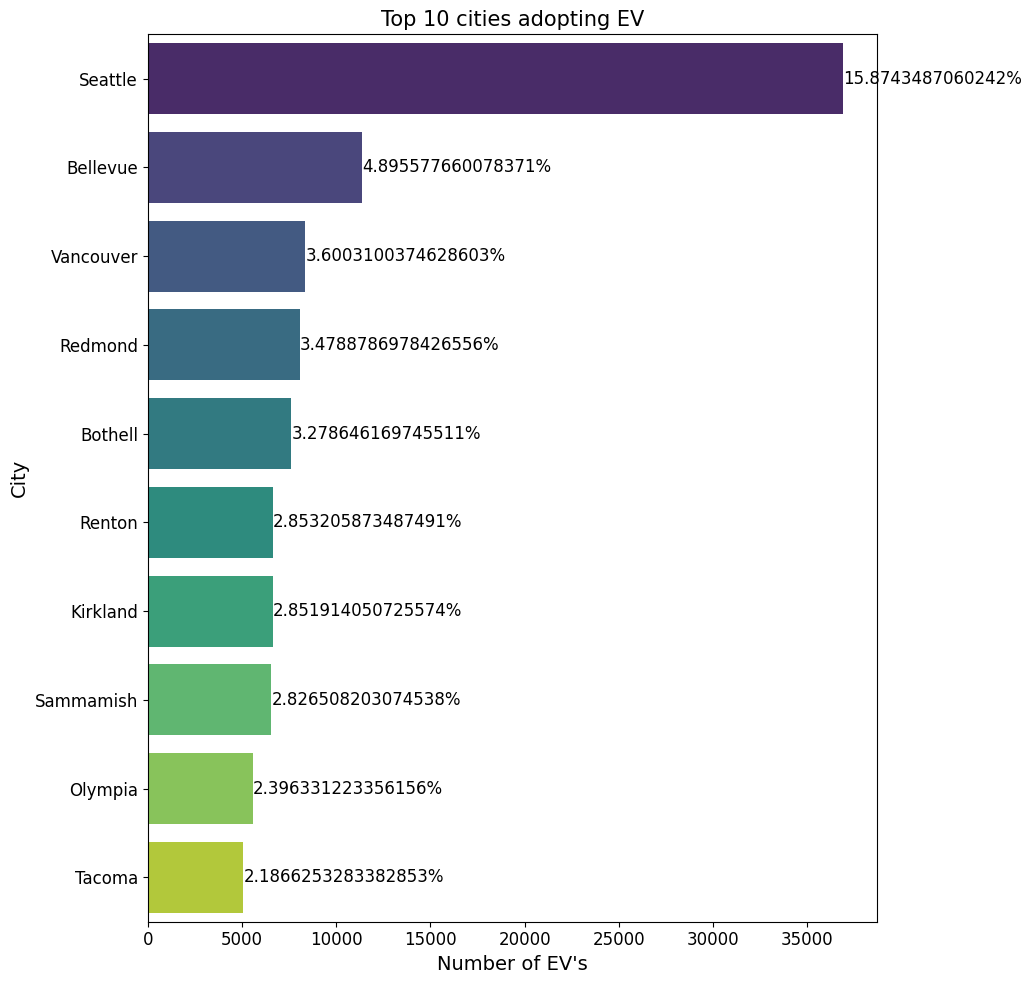

<Figure size 1400x800 with 0 Axes>

In [ ]:
#Question 6 Top Cities adopting EV's
print("****   Top Cities adopting EV's  *****")
city_counts=df['City'].value_counts().reset_index()
city_counts.columns=['City','Count']
city_counts['Percentage']=(city_counts['Count']/city_counts['Count'].sum()*100)
print(city_counts.head(10))

fig=plt.figure(figsize=(18,10))

ax1=fig.add_subplot(121)
sns.barplot(x='Count',y='City',data=city_counts.head(10),palette='viridis',ax=ax1)
ax1.set_title('Top 10 cities adopting EV',fontsize=15)
ax1.set_xlabel("Number of EV's",fontsize=14)
ax1.set_ylabel("City",fontsize=14)

#innotations
for i, row in enumerate(city_counts.head(10).iterrows()):
    ax1.text(row[1]['Count'] + 10, i, f"{row[1]['Percentage']}%", va='center')

others_count = city_counts.iloc[10:]['Count'].sum()
top_cities_pie = pd.concat([city_counts.head(10),
                          pd.DataFrame({'City': ['Others'], 'Count': [others_count],
                                       'Percentage': [city_counts.iloc[10:]['Percentage'].sum()]})],
                         ignore_index=True)

wedges, texts, autotexts = ax2.pie(top_cities_pie['Count'], labels=top_cities_pie['City'],
                                  autopct='%1.1f%%', startangle=90,
                                  explode=[0.05 if i < 5 else 0 for i in range(len(top_cities_pie))],
                                  colors=sns.color_palette('viridis', len(top_cities_pie)))

plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

ax2.set_title('Distribution of EVs by City', fontsize=16)
ax2.axis('equal')

plt.tight_layout()
plt.show()


plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

ax2.set_title('Distribution of EVs by City', fontsize=16)
ax2.axis('equal')

plt.tight_layout()
plt.show()

fig = px.bar(city_counts.head(15), x='Count', y='City', orientation='h',
            title='Top 15 Cities Adopting EVs in Washington State',
            labels={'Count': 'Number of Vehicles', 'City': 'City'},
            color='Count', text='Percentage',
            color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

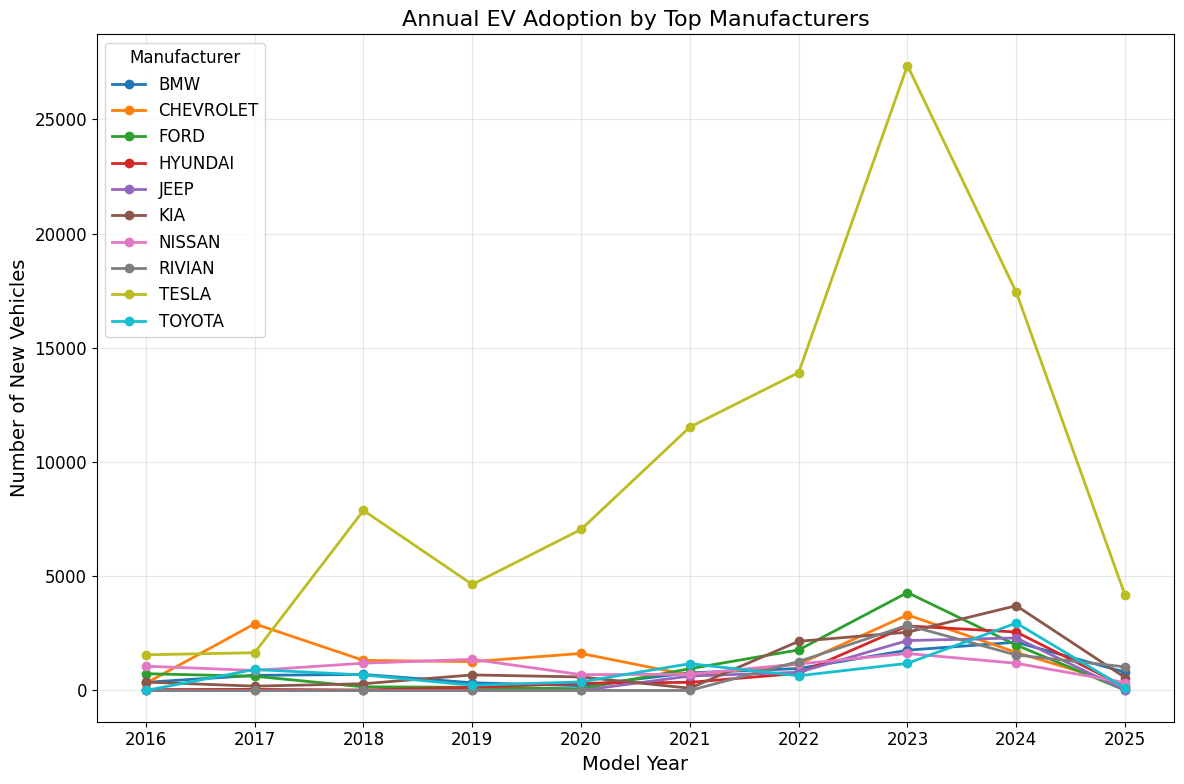

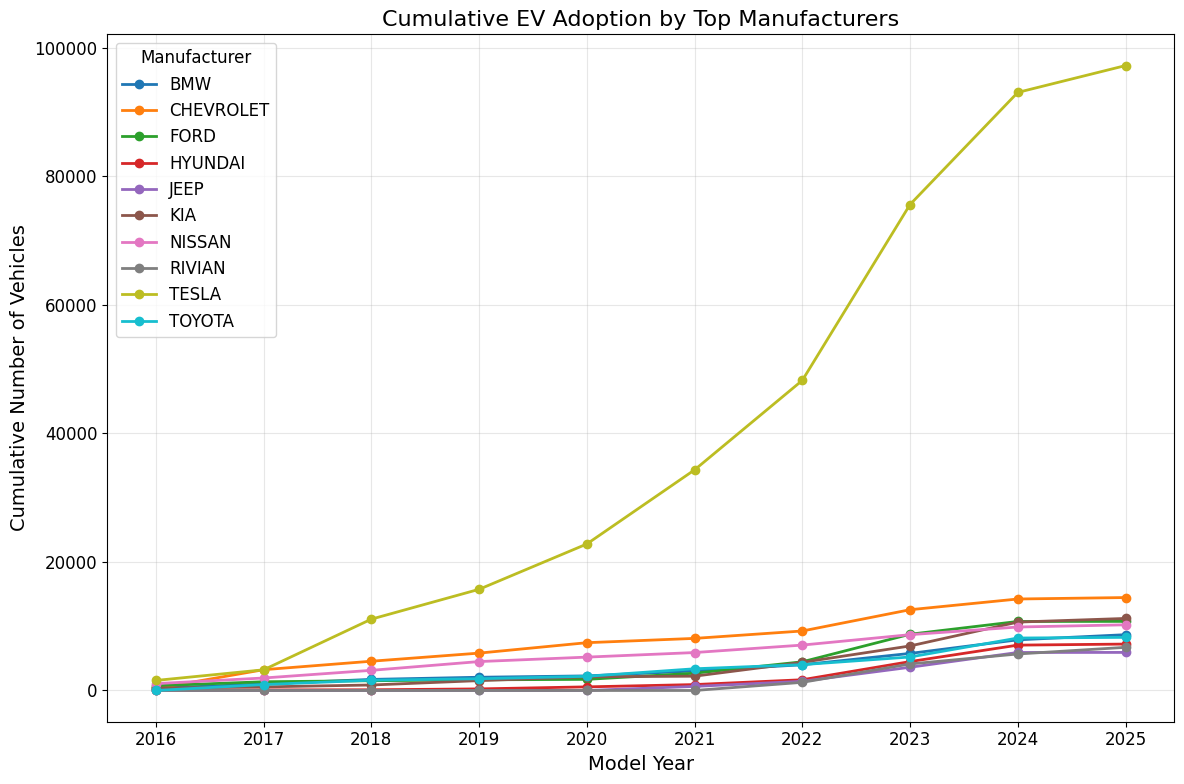

<Figure size 1200x800 with 0 Axes>

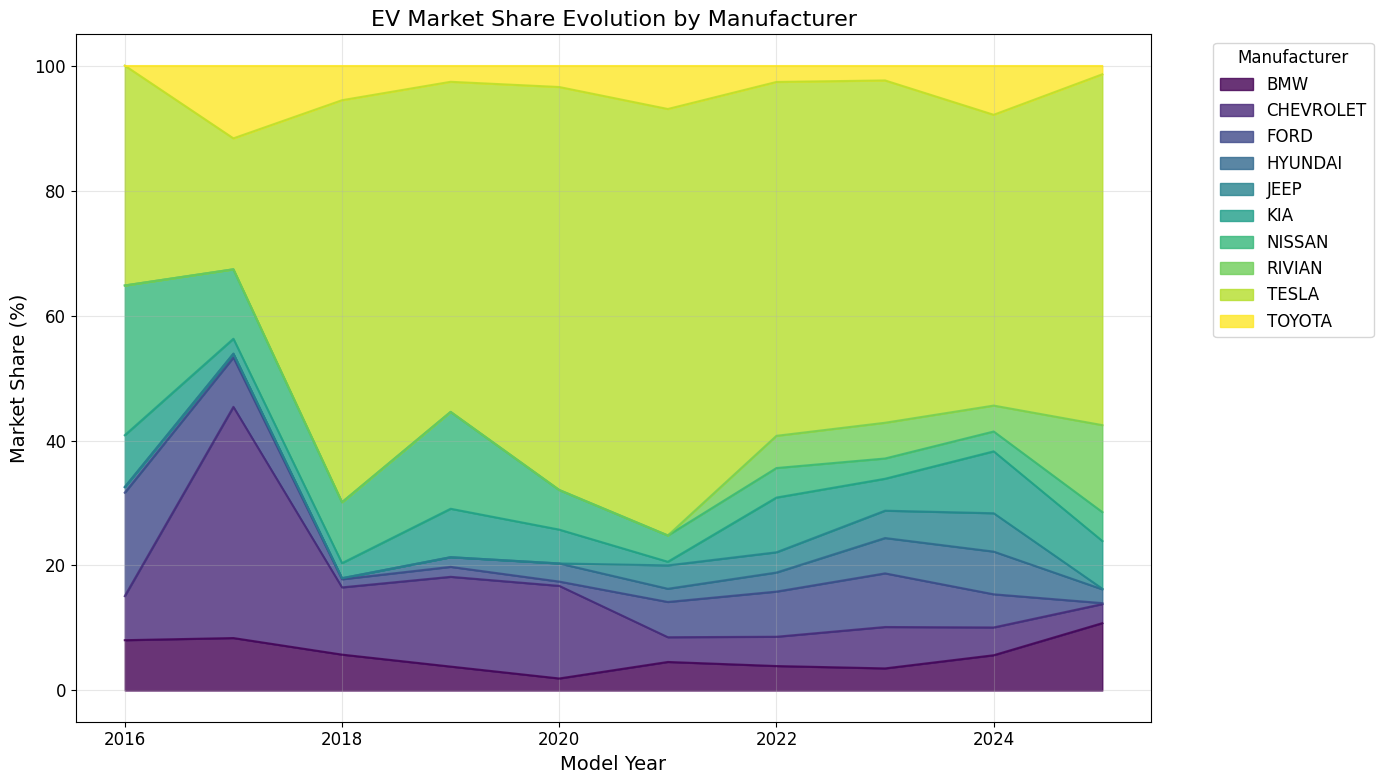

In [43]:
# QUESTION 7: How does the EV adoption rate vary among car makers over the years?

df['Model Year'] = pd.to_numeric(df['Model Year'], errors='coerce')
adoption_by_year_make = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')
current_year = df['Model Year'].max()
recent_years = list(range(current_year - 9, current_year + 1))
recent_adoption = adoption_by_year_make[adoption_by_year_make['Model Year'].isin(recent_years)]

top_10_makes = make_counts.head(10)['Make'].tolist()
top_recent_adoption = recent_adoption[recent_adoption['Make'].isin(top_10_makes)]
adoption_pivot = top_recent_adoption.pivot(index='Model Year', columns='Make', values='Count').fillna(0)

cumulative_adoption = adoption_pivot.cumsum()

#Year by year trend
plt.figure(figsize=(12, 8))
for make in adoption_pivot.columns:
    plt.plot(adoption_pivot.index, adoption_pivot[make], marker='o', linewidth=2, label=make)

plt.title('Annual EV Adoption by Top Manufacturers', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of New Vehicles', fontsize=14)
plt.legend(fontsize=12, title='Manufacturer')
plt.grid(True, alpha=0.3)
plt.xticks(adoption_pivot.index)
plt.tight_layout()
plt.show()

# 2. Cumulative Adoption
plt.figure(figsize=(12, 8))
for make in cumulative_adoption.columns:
    plt.plot(cumulative_adoption.index, cumulative_adoption[make], marker='o', linewidth=2, label=make)

plt.title('Cumulative EV Adoption by Top Manufacturers', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Cumulative Number of Vehicles', fontsize=14)
plt.legend(fontsize=12, title='Manufacturer')
plt.grid(True, alpha=0.3)
plt.xticks(cumulative_adoption.index)
plt.tight_layout()
plt.show()


fig = px.area(adoption_pivot.reset_index().melt(id_vars='Model Year', var_name='Make', value_name='Count'),
             x='Model Year', y='Count', color='Make',
             title='EV Adoption Trends by Top Manufacturers',
             labels={'Count': 'Number of Vehicles', 'Model Year': 'Year'})
fig.show()


market_share = adoption_pivot.div(adoption_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
market_share.plot(kind='area', stacked=True, colormap='viridis', alpha=0.8)
plt.title('EV Market Share Evolution by Manufacturer', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)
plt.legend(fontsize=12, title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



                City  Avg_Range   Std_Range  Median_Range  Count
784     Yarrow Point  78.627451  107.065946           0.0    153
251    Friday Harbor  77.404339   95.944114          35.0    507
217          Everson  76.355769  101.077584          29.5    104
187        Eastsound  73.014535   82.174686          42.0    344
779          Woodway  69.201754   97.741141          14.5    114
417           Medina  67.247396  102.184182           0.0    384
361          Langley  66.193651   95.097188          21.0    315
131       Clyde Hill  65.075269  103.185305           0.0    372
548    Port Townsend  64.551129   88.738831          25.0    753
732           Vashon  64.537158   84.544152          26.0    767
473    Normandy Park  63.716561   95.606084           3.0    314
469  Nine Mile Falls  63.531915   92.213692          21.0    141
633            Selah  62.867188   93.398846          18.5    128
221        Fall City  62.618375   98.547875           0.0    283
631    Sedro-Woolley  60.

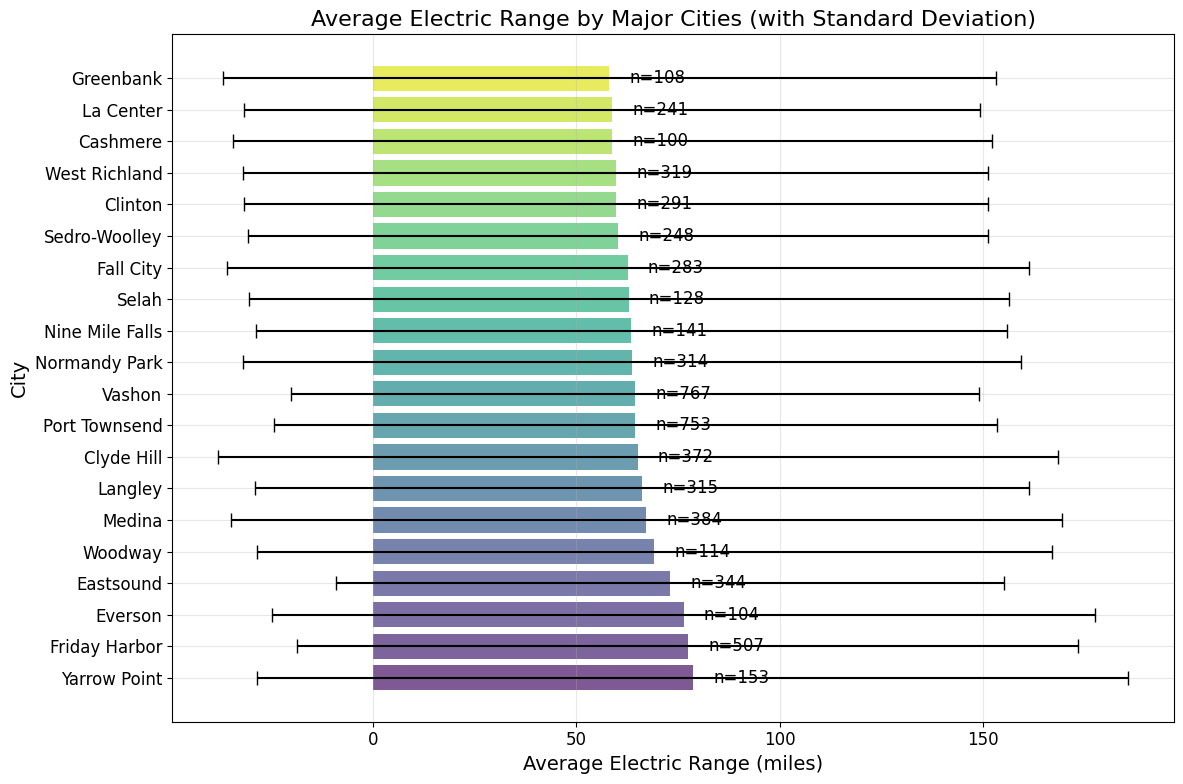

In [44]:
# QUESTION 8: Is there a correlation between the electric range and the city of an EV?

significant_cities = df_with_range['City'].value_counts()
significant_cities = significant_cities[significant_cities >= 100].index.tolist()
df_significant_cities = df_with_range[df_with_range['City'].isin(significant_cities)]

city_range_stats = df_significant_cities.groupby('City').agg({
    'Electric Range': ['mean', 'std', 'median', 'count']
}).reset_index()
city_range_stats.columns = ['City', 'Avg_Range', 'Std_Range', 'Median_Range', 'Count']
city_range_stats = city_range_stats.sort_values('Avg_Range', ascending=False).head(20)
print(city_range_stats)


plt.figure(figsize=(12, 8))
bars = plt.barh(city_range_stats['City'], city_range_stats['Avg_Range'],
               xerr=city_range_stats['Std_Range'],
               color=sns.color_palette('viridis', len(city_range_stats)), alpha=0.7,
               error_kw={'ecolor': 'black', 'capsize': 5})

for i, (_, row) in enumerate(city_range_stats.iterrows()):
    plt.text(row['Avg_Range'] + 5, i, f"n={int(row['Count'])}", va='center')

plt.title('Average Electric Range by Major Cities (with Standard Deviation)', fontsize=16)
plt.xlabel('Average Electric Range (miles)', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



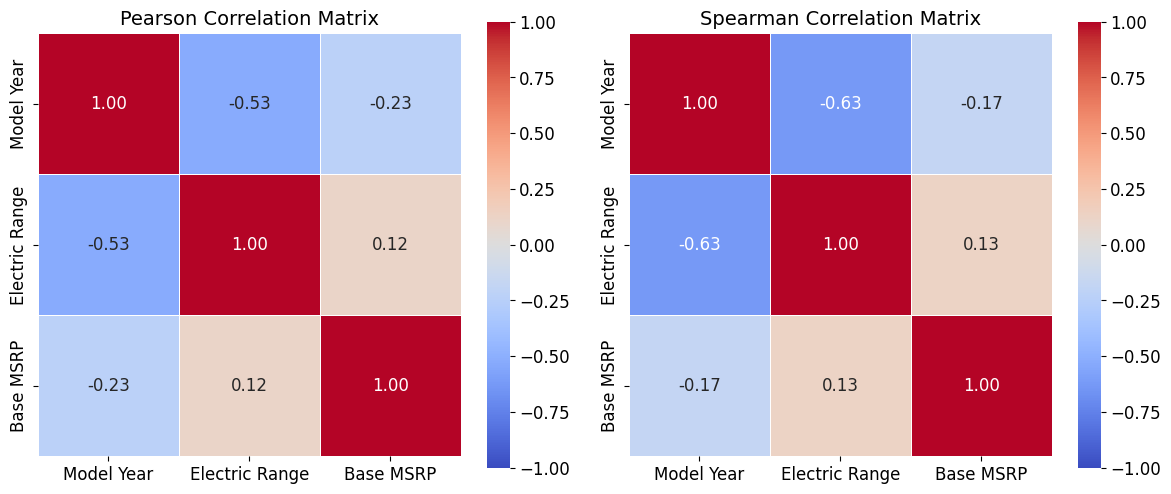

Pearson Correlation Matrix:
                Model Year  Electric Range  Base MSRP
Model Year        1.000000       -0.527665  -0.228725
Electric Range   -0.527665        1.000000   0.116426
Base MSRP        -0.228725        0.116426   1.000000

Spearman Correlation Matrix:
                Model Year  Electric Range  Base MSRP
Model Year        1.000000       -0.626404  -0.172580
Electric Range   -0.626404        1.000000   0.128247
Base MSRP        -0.172580        0.128247   1.000000

Point-biserial correlation between Electric Range and each City:
Tukwila: r = -0.0337, p = 0.00000000, significant: Yes
Bothell: r = -0.0189, p = 0.00000000, significant: Yes
Seatac: r = -0.0181, p = 0.00000000, significant: Yes
Friday Harbor: r = 0.0172, p = 0.00000000, significant: Yes
Kent: r = -0.0158, p = 0.00000000, significant: Yes
Seattle: r = 0.0143, p = 0.00000000, significant: Yes
Lynnwood: r = -0.0141, p = 0.00000000, significant: Yes
Mercer Island: r = 0.0133, p = 0.00000000, significant: Ye

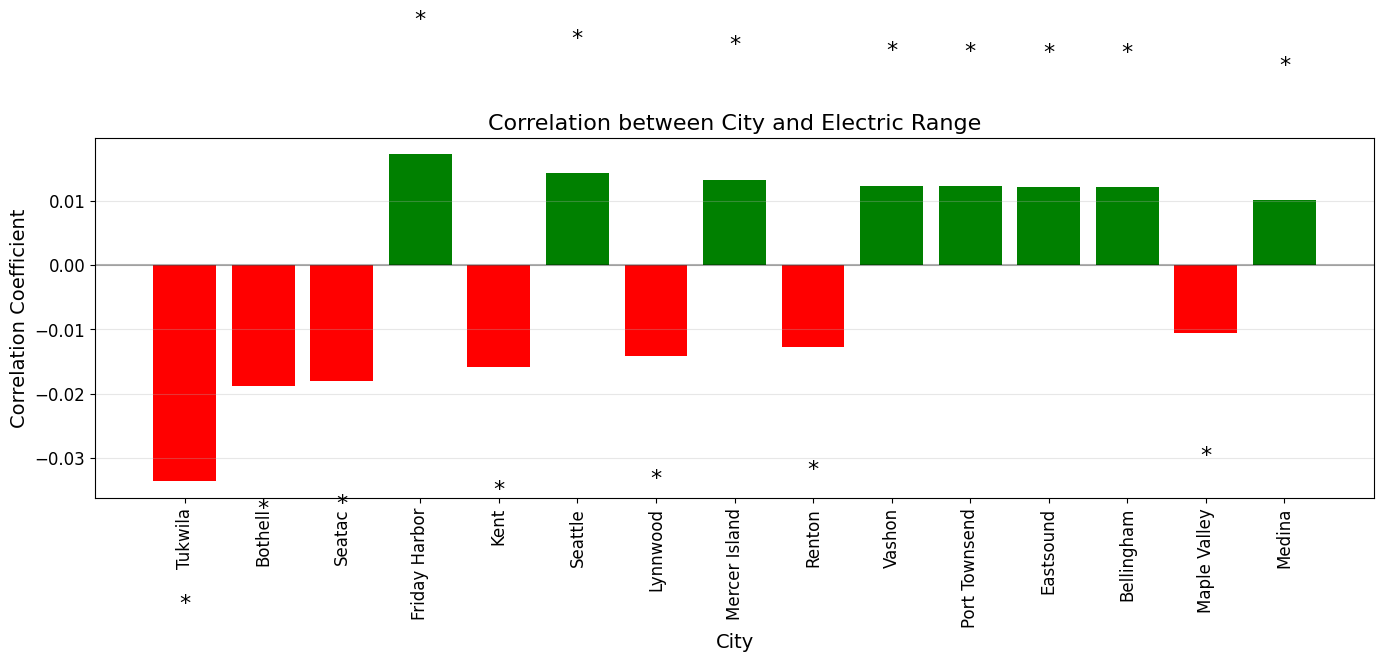

<Figure size 1400x800 with 0 Axes>

In [45]:
#person corr
numeric_columns = ['Model Year', 'Electric Range', 'Base MSRP']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Correlation between numeric variables
# ---------------------------------------
corr_cols = [col for col in numeric_columns if col in df.columns]

if len(corr_cols) >= 2:
    #   Pearson and Spearman correlations
    pearson_corr = df[corr_cols].corr(method='pearson')
    spearman_corr = df[corr_cols].corr(method='spearman')

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                square=True, fmt='.2f', linewidths=0.5)
    plt.title('Pearson Correlation Matrix', fontsize=14)

    plt.subplot(1, 2, 2)
    sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                square=True, fmt='.2f', linewidths=0.5)
    plt.title('Spearman Correlation Matrix', fontsize=14)

    plt.tight_layout()
    plt.show()

    print("Pearson Correlation Matrix:")
    print(pearson_corr)
    print("\nSpearman Correlation Matrix:")
    print(spearman_corr)

# 3. Relationship between Electric Range and City
if 'Electric Range' in df.columns and 'City' in df.columns:
    # Get cities with at least 50 vehicles for statistical significance
    significant_cities = df['City'].value_counts()
    significant_cities = significant_cities[significant_cities >= 50].index.tolist()

    if len(significant_cities) > 0:
        df_cities = df[df['City'].isin(significant_cities)].copy()

        df_cities = df_cities.dropna(subset=['Electric Range'])

        # Calculate point-biserial correlation for each city
        print("\nPoint-biserial correlation between Electric Range and each City:")
        correlations = {}

        for city in significant_cities:
            df_cities[f'is_{city}'] = (df_cities['City'] == city).astype(int)

            if df_cities[df_cities[f'is_{city}'] == 1].shape[0] >= 5:
                    corr, p = stats.pearsonr(df_cities[f'is_{city}'], df_cities['Electric Range'])
                    correlations[city] = {'correlation': corr, 'p_value': p}

        # Only proceed if we have correlations
        if correlations:
            # Display results sorted by absolute correlation strength
            sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)

            for city, stats_dict in sorted_correlations:
                print(f"{city}: r = {stats_dict['correlation']:.4f}, p = {stats_dict['p_value']:.8f}, " +
                      f"significant: {'Yes' if stats_dict['p_value'] < 0.05 else 'No'}")

            # Visualize correlations with bar chart
            cities = [city for city, _ in sorted_correlations]
            corr_values = [stats_dict['correlation'] for _, stats_dict in sorted_correlations]
            p_values = [stats_dict['p_value'] for _, stats_dict in sorted_correlations]

            # Limit to top 15 cities by correlation strength for readability
            if len(cities) > 15:
                cities = cities[:15]
                corr_values = corr_values[:15]
                p_values = p_values[:15]

            plt.figure(figsize=(14, 8))
            bars = plt.bar(cities, corr_values, color=[
                'green' if corr > 0 and p < 0.05 else
                'red' if corr < 0 and p < 0.05 else
                'lightgreen' if corr > 0 else 'lightcoral'
                for corr, p in zip(corr_values, p_values)
            ])

            plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            plt.title('Correlation between City and Electric Range', fontsize=16)
            plt.xlabel('City', fontsize=14)
            plt.ylabel('Correlation Coefficient', fontsize=14)
            plt.xticks(rotation=90)
            plt.grid(True, axis='y', alpha=0.3)

            # Add significance markers
            for i, p in enumerate(p_values):
                if p < 0.05:
                    plt.text(i, corr_values[i] + (0.02 if corr_values[i] > 0 else -0.02),
                             '*', ha='center', fontsize=16)

            plt.tight_layout()
            plt.show()

        plt.tight_layout()
        plt.show()



QUESTION 9: County with Greatest EV Model Variety 
--- Top 10 Counties by Model Variety ---
        County  Unique_Models  Unique_Makes  Total_Vehicles
91        King            165            44          117098
175  Snohomish            148            37           28291
144     Pierce            147            40           18946
36       Clark            144            39           13895
93      Kitsap            133            37            7770
178    Spokane            131            36            6521
201    Whatcom            129            38            5625
188   Thurston            128            37            8490
82      Island            115            36            2508
16      Benton            114            34            2991


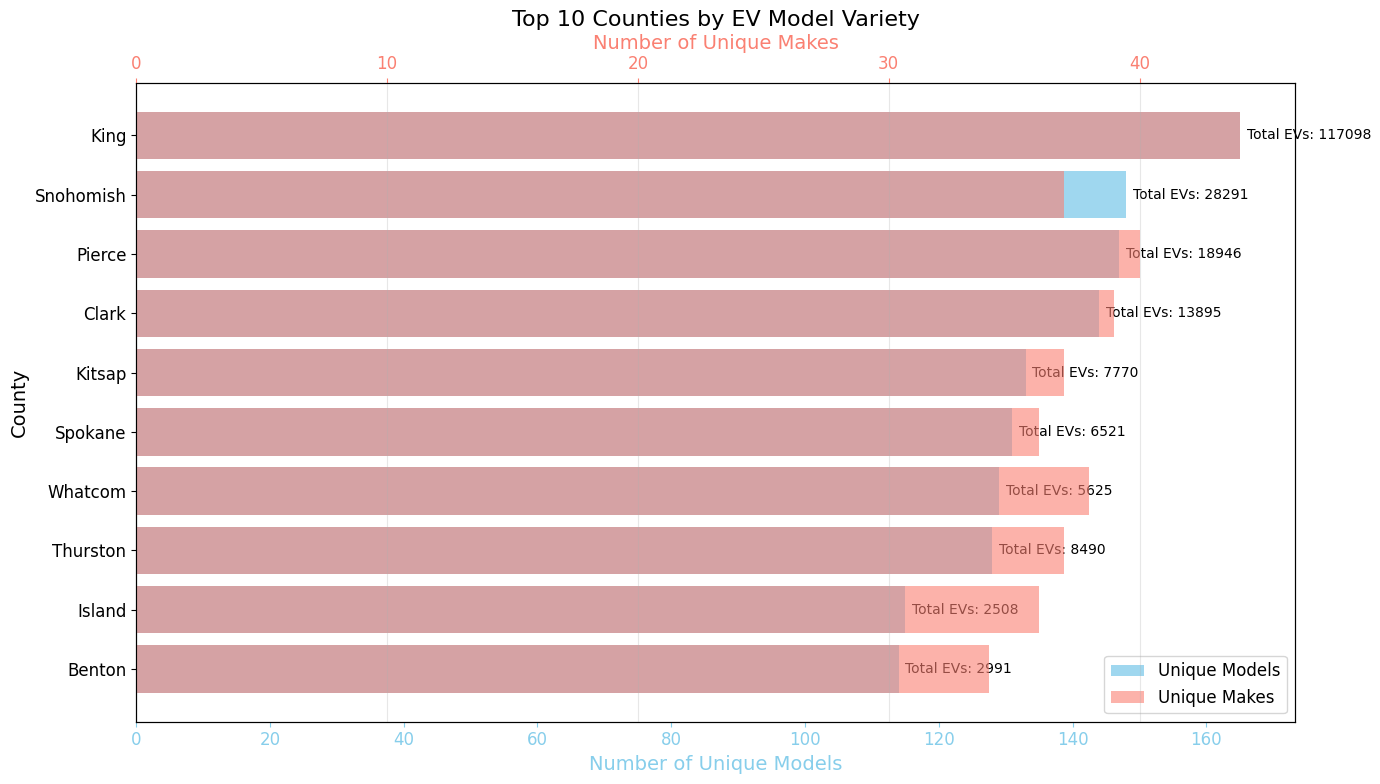


--- Top 10 Counties by Model Diversity Index ---
            County  Diversity_Index  Unique_Models  Total_Vehicles
68        Hamilton            100.0              2               2
0              Ada            100.0              1               1
164  San Francisco            100.0              1               1
189      Tom Green            100.0              1               1
190         Tooele            100.0              1               1
191         Travis            100.0              1               1
161      Salt Lake            100.0              1               1
194        Volusia            100.0              1               1
180   St. Lawrence            100.0              1               1
198          Wasco            100.0              1               1


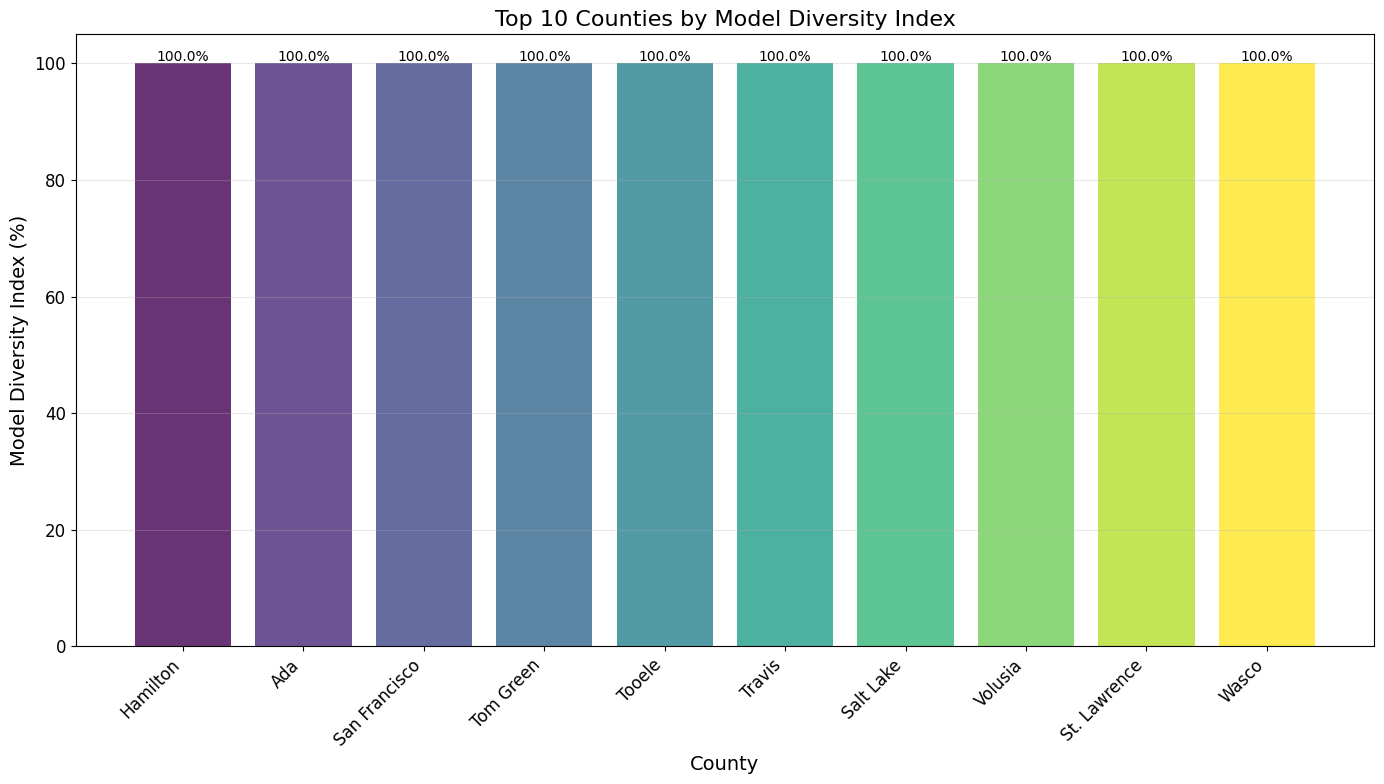

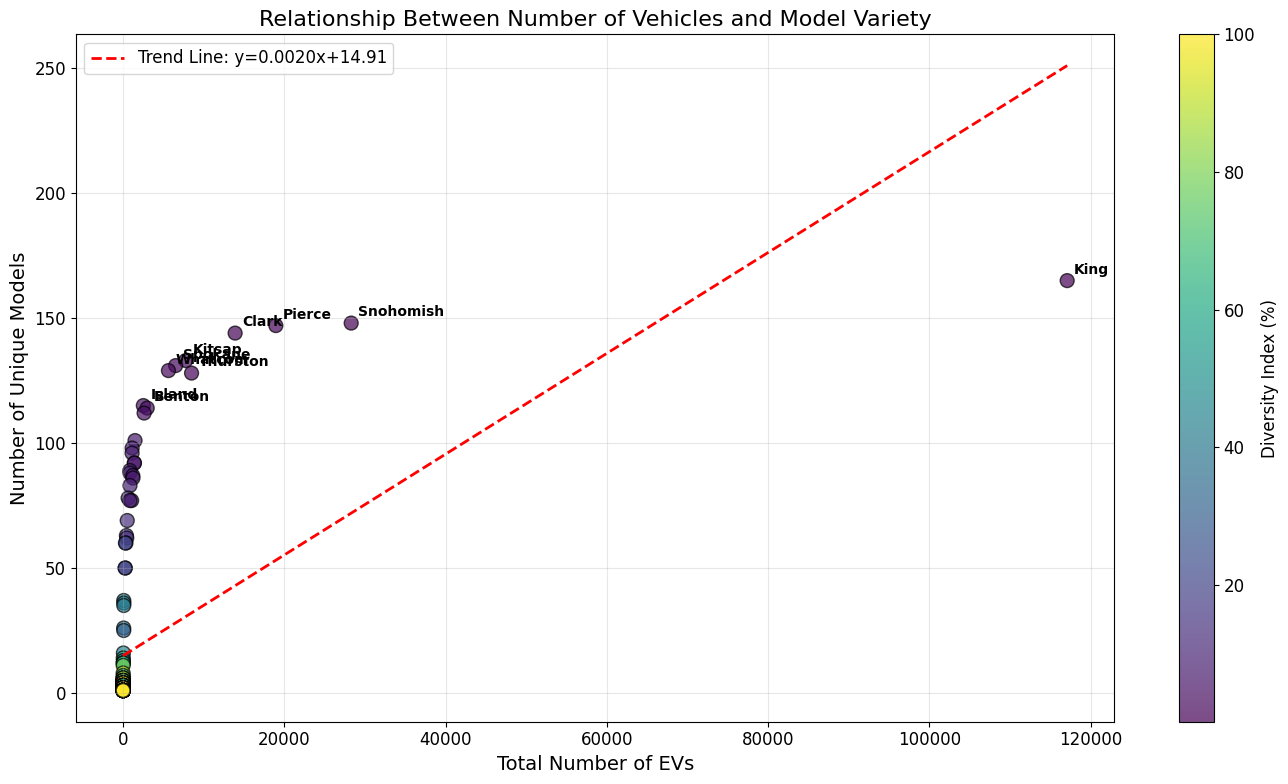


The county with the greatest variety of EV car models is King with 165 unique models.
This county also has 44 unique manufacturers and a total of 117098 electric vehicles.


In [40]:
# QUESTION 9: Which county has the greatest variety of EV car models?
print("QUESTION 9: County with Greatest EV Model Variety ")

model_variety = df.groupby('County').agg({
    'Model': 'nunique',
    'Make': 'nunique',
    'VIN (1-10)': 'count'  # Total vehicles
}).reset_index()
model_variety.columns = ['County', 'Unique_Models', 'Unique_Makes', 'Total_Vehicles']
model_variety = model_variety.sort_values('Unique_Models', ascending=False)

print("--- Top 10 Counties by Model Variety ---")
print(model_variety.head(10))

# V top 10 counties
plt.figure(figsize=(14, 8))

top_counties = model_variety.head(10).sort_values('Unique_Models')

# Create bar chart for models
ax1 = plt.subplot(111)
bars1 = ax1.barh(top_counties['County'], top_counties['Unique_Models'],
                color='skyblue', alpha=0.8, label='Unique Models')

# Add manufacturer variety on the same chart
ax2 = ax1.twiny()
bars2 = ax2.barh(top_counties['County'], top_counties['Unique_Makes'],
                color='salmon', alpha=0.6, label='Unique Makes')

for i, (_, row) in enumerate(top_counties.iterrows()):
    ax1.text(row['Unique_Models'] + 1, i, f"Total EVs: {row['Total_Vehicles']}",
             va='center', fontsize=10)

ax1.set_title('Top 10 Counties by EV Model Variety', fontsize=16)
ax1.set_xlabel('Number of Unique Models', fontsize=14, color='skyblue')
ax1.set_ylabel('County', fontsize=14)
ax1.tick_params(axis='x', colors='skyblue')

ax2.set_xlabel('Number of Unique Makes', fontsize=14, color='salmon')
ax2.tick_params(axis='x', colors='salmon')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate model diversity index (unique models per 100 vehicles)
model_variety['Diversity_Index'] = (model_variety['Unique_Models'] / model_variety['Total_Vehicles'] * 100).round(2)
model_variety['Make_Diversity_Index'] = (model_variety['Unique_Makes'] / model_variety['Total_Vehicles'] * 100).round(2)

print("\n--- Top 10 Counties by Model Diversity Index ---")
diversity_counties = model_variety.sort_values('Diversity_Index', ascending=False).head(10)
print(diversity_counties[['County', 'Diversity_Index', 'Unique_Models', 'Total_Vehicles']])

plt.figure(figsize=(14, 8))
bars = plt.bar(diversity_counties['County'], diversity_counties['Diversity_Index'],
              color=plt.cm.viridis(np.linspace(0, 1, len(diversity_counties))), alpha=0.8)

for i, v in enumerate(diversity_counties['Diversity_Index']):
    plt.text(i, v + 0.5, f"{v}%", ha='center', fontsize=10)

plt.title('Top 10 Counties by Model Diversity Index', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Model Diversity Index (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.scatter(model_variety['Total_Vehicles'], model_variety['Unique_Models'],
           c=model_variety['Diversity_Index'], cmap='viridis',
           alpha=0.7, s=100, edgecolors='black', linewidths=1)

for i, row in model_variety.head(10).iterrows():
    plt.annotate(row['County'],
                xy=(row['Total_Vehicles'], row['Unique_Models']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

cbar = plt.colorbar()
cbar.set_label('Diversity Index (%)', fontsize=12)

z = np.polyfit(model_variety['Total_Vehicles'], model_variety['Unique_Models'], 1)
p = np.poly1d(z)
plt.plot(np.sort(model_variety['Total_Vehicles']),
         p(np.sort(model_variety['Total_Vehicles'])),
         "r--", linewidth=2, label=f"Trend Line: y={z[0]:.4f}x+{z[1]:.2f}")

plt.title('Relationship Between Number of Vehicles and Model Variety', fontsize=16)
plt.xlabel('Total Number of EVs', fontsize=14)
plt.ylabel('Number of Unique Models', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

top_county = model_variety.iloc[0]
print(f"\nThe county with the greatest variety of EV car models is {top_county['County']} with {top_county['Unique_Models']} unique models.")
print(f"This county also has {top_county['Unique_Makes']} unique manufacturers and a total of {top_county['Total_Vehicles']} electric vehicles.")